/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


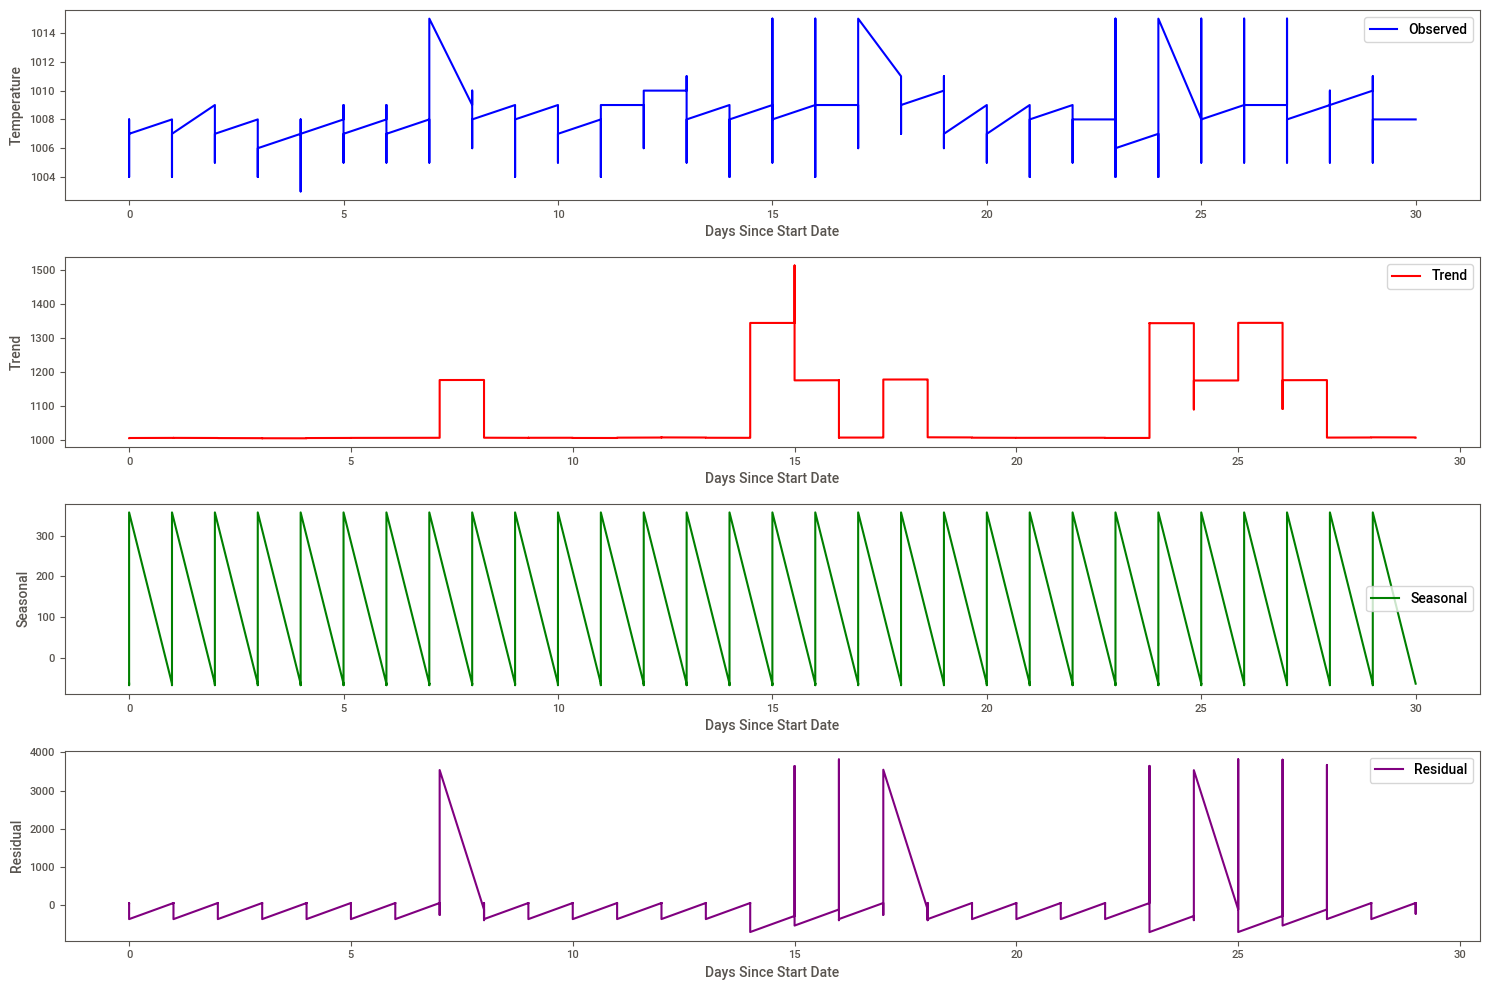

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Baca data dari file CSV atau sumber data lainnya
df = pd.read_csv("prep.csv")

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Filter data hanya untuk bulan Desember 2010
start_date = pd.to_datetime('2010-12-01')
end_date = pd.to_datetime('2010-12-31')
december_2010_data = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Tentukan variabel independen (x) dan dependen (y)
x = (december_2010_data['datetime'] - start_date).dt.days  # Menghitung jumlah hari sejak tanggal awal
y = december_2010_data['prssr']  # Kolom suhu sebagai variabel dependen

# Batasi nilai ekstrem suhu
lower_limit = -1000  # Batas bawah
upper_limit = 1015  # Batas atas
y = y.clip(lower=lower_limit, upper=upper_limit)

# Membuat DataFrame dengan indeks waktu
december_2010_data['datetime'] = pd.to_datetime(december_2010_data['datetime'], unit='s')
december_2010_data.set_index('datetime', inplace=True)

# Melakukan Time Series Decomposition
result = seasonal_decompose(december_2010_data['prssr'], model='additive')

# Plot hasil decomposition
plt.figure(figsize=(15, 10))

plt.subplot(411)
plt.plot(x, y, label='Observed', color="blue")
plt.xlabel("Days Since Start Date")
plt.ylabel("Temperature")
plt.legend()

plt.subplot(412)
plt.plot(x, result.trend, label='Trend', color="red")
plt.xlabel("Days Since Start Date")
plt.ylabel("Trend")
plt.legend()

plt.subplot(413)
plt.plot(x, result.seasonal, label='Seasonal', color="green")
plt.xlabel("Days Since Start Date")
plt.ylabel("Seasonal")
plt.legend()

plt.subplot(414)
plt.plot(x, result.resid, label='Residual', color="purple")
plt.xlabel("Days Since Start Date")
plt.ylabel("Residual")
plt.legend()

plt.tight_layout()
plt.show()


In [117]:
df.describe()

,time-zone,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds
count,341880.0,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,320590.000000,341880.00000
mean,28800.0,28.296996,26.056234,31.092778,27.483902,29.359565,1070.960983,82.562916,1.474819,210.867372,0.360764,85.44976
std,0.0,13.325830,12.080483,15.228520,12.924432,13.802332,494.664951,52.157474,1.104015,147.667380,0.980127,22.80106
min,28800.0,21.550000,13.960000,22.350000,14.120000,22.370000,1001.000000,0.360000,0.000000,0.000000,-1.000000,0.00000
25%,28800.0,24.980000,23.950000,25.990000,24.250000,25.970000,1009.000000,78.000000,0.880000,149.000000,0.000000,81.00000
50%,28800.0,26.200000,24.570000,26.650000,25.480000,27.270000,1010.000000,91.000000,1.270000,203.000000,0.000000,97.00000
75%,28800.0,28.390000,25.240000,33.370000,27.640000,29.310000,1011.000000,96.000000,1.800000,279.000000,0.250000,100.00000
max,28800.0,177.260000,141.590000,202.710000,162.920000,187.170000,5115.000000,503.000000,25.000000,1810.800000,27.100000,100.00000


In [118]:
result.trend.describe()

count    341856.000000
mean       1070.959395
std         100.353730
min        1004.541667
25%        1009.500000
50%        1010.708333
75%        1178.083333
max        1860.708333
Name: trend, dtype: float64

In [100]:
# Membuat DataFrame baru dengan kolom tren untuk seluruh dataset
trend_data = pd.DataFrame({'datetime': df.index, 'Trend': result.trend})

# Simpan DataFrame tren ke dalam file CSV
trend_data.to_csv("trend_data_prssr.csv", index=False)

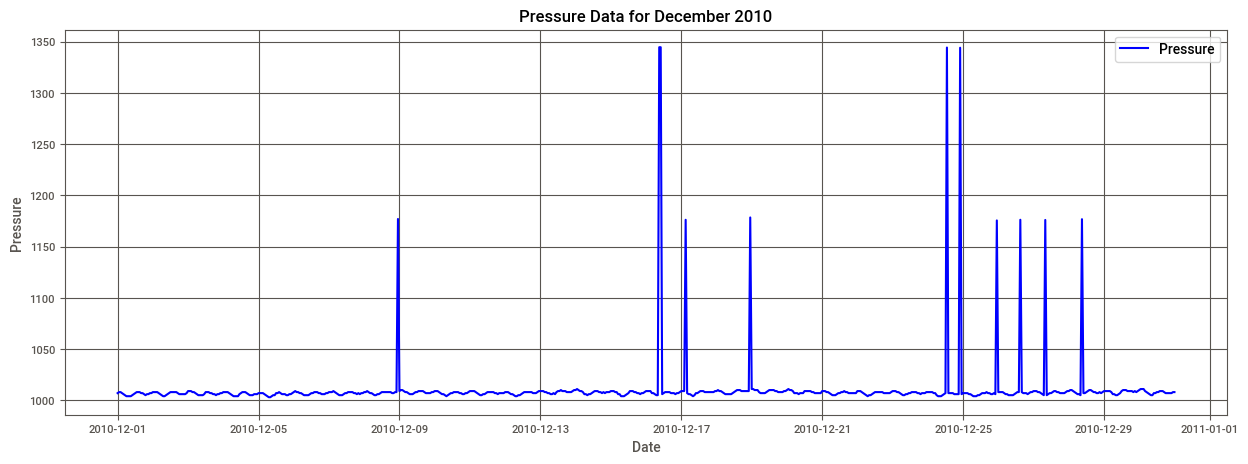

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data dari file CSV
df = pd.read_csv("prep.csv")

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Filter data hanya untuk bulan Desember 2010
start_date = pd.to_datetime('2010-12-01')
end_date = pd.to_datetime('2010-12-31')
december_2010_data = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Baca data dari file 'trend_data_prssr.csv'
trend_data = pd.read_csv("trend_data_prssr.csv")

# Konversi kolom 'datetime' di DataFrame trend_data ke tipe data datetime
trend_data['datetime'] = pd.to_datetime(trend_data['datetime'])

# Gabungkan data suhu dengan tren dari file 'trend_data.csv' berdasarkan kolom datetime
december_2010_data = december_2010_data.merge(trend_data, on='datetime', how='left')

# Ganti nilai kolom 'prssr' yang lebih dari 1050 dengan nilai tren dari 'trend_data.csv'
december_2010_data.loc[december_2010_data['prssr'] > 1015, 'prssr'] = december_2010_data['Trend']

# Tampilkan visualisasi data suhu
plt.figure(figsize=(15, 5))
plt.plot(december_2010_data['datetime'], december_2010_data['prssr'], label='Pressure', color="blue")
plt.xlabel("Date")
plt.ylabel("Pressure")
plt.title("Pressure Data for December 2010")
plt.legend()
plt.grid(True)
plt.show()


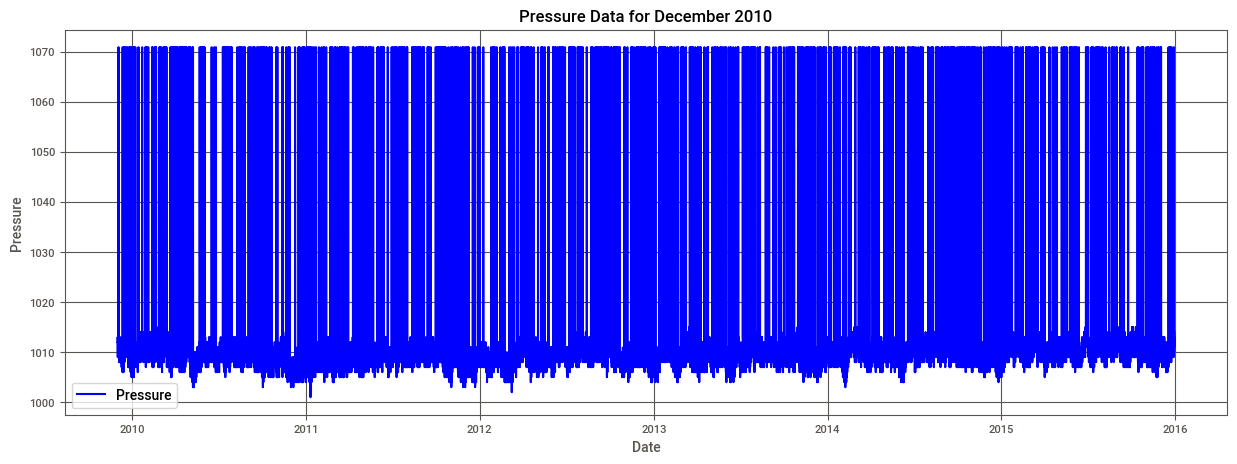

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data dari file CSV
df = pd.read_csv("prep.csv")

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Filter data hanya untuk bulan Desember 2010
start_date = pd.to_datetime('2009-12-01')
end_date = pd.to_datetime('2015-12-31')
december_2010_data = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Baca data dari file 'trend_data_prssr.csv'
trend_data = pd.read_csv("trend_data_prssr.csv")

# Konversi kolom 'datetime' di DataFrame trend_data ke tipe data datetime
trend_data['datetime'] = pd.to_datetime(trend_data['datetime'])

# Gabungkan data suhu dengan tren dari file 'trend_data.csv' berdasarkan kolom datetime
december_2010_data = december_2010_data.merge(trend_data, on='datetime', how='left')

# Ganti nilai kolom 'prssr' yang lebih dari 1015 dengan nilai rata-rata dari data tersebut
mean_prssr = december_2010_data['prssr'].mean()
december_2010_data.loc[december_2010_data['prssr'] > 1015, 'prssr'] = mean_prssr

# Tampilkan visualisasi data suhu
plt.figure(figsize=(15, 5))
plt.plot(december_2010_data['datetime'], december_2010_data['prssr'], label='Pressure', color="blue")
plt.xlabel("Date")
plt.ylabel("Pressure")
plt.title("Pressure Data for December 2010")
plt.legend()
plt.grid(True)
plt.show()

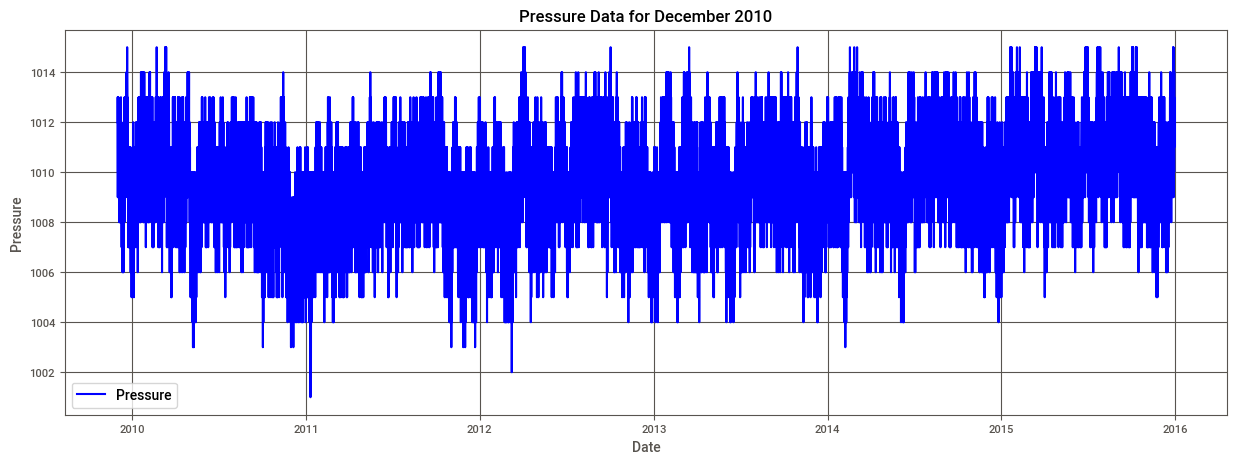

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data dari file CSV
df = pd.read_csv("prep.csv")

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Filter data hanya untuk bulan Desember 2010
start_date = pd.to_datetime('2009-12-01')
end_date = pd.to_datetime('2015-12-31')
december_2010_data = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Baca data dari file 'trend_data_prssr.csv'
trend_data = pd.read_csv("trend_data_prssr.csv")

# Konversi kolom 'datetime' di DataFrame trend_data ke tipe data datetime
trend_data['datetime'] = pd.to_datetime(trend_data['datetime'])

# Gabungkan data suhu dengan tren dari file 'trend_data.csv' berdasarkan kolom datetime
december_2010_data = december_2010_data.merge(trend_data, on='datetime', how='left')

# Ganti nilai kolom 'prssr' yang lebih dari 1015 dengan nilai modus dari data tersebut
mode_prssr = december_2010_data['prssr'].mode().iloc[0]  # Ambil modus dari kolom prssr
december_2010_data.loc[december_2010_data['prssr'] > 1015, 'prssr'] = mode_prssr

# Tampilkan visualisasi data suhu
plt.figure(figsize=(15, 5))
plt.plot(december_2010_data['datetime'], december_2010_data['prssr'], label='Pressure', color="blue")
plt.xlabel("Date")
plt.ylabel("Pressure")
plt.title("Pressure Data for December 2010")
plt.legend()
plt.grid(True)
plt.show()

In [119]:
import pandas as pd

# Baca data dari file CSV
df = pd.read_csv("prep.csv")

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Baca data dari file 'trend_data_prssr.csv'
trend_data = pd.read_csv("trend_data_prssr.csv")

# Konversi kolom 'datetime' di DataFrame trend_data ke tipe data datetime
trend_data['datetime'] = pd.to_datetime(trend_data['datetime'])

# Gabungkan data suhu dengan tren dari file 'trend_data.csv' berdasarkan kolom datetime
df = df.merge(trend_data, on='datetime', how='left')

# Ganti nilai kolom 'prssr' yang lebih dari 1050 dengan nilai tren dari 'trend_data.csv'
df.loc[df['prssr'] > 1015, 'prssr'] = df['Trend']

# Simpan DataFrame yang telah diubah kembali ke file CSV
df.to_csv("modified_prep.csv", index=False)

In [120]:
df.describe()

,time-zone,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds,Trend
count,341880.0,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,320590.000000,341880.00000,341856.000000
mean,28800.0,28.296996,26.056234,31.092778,27.483902,29.359565,1013.395208,82.562916,1.474819,210.867372,0.360764,85.44976,1070.959395
std,0.0,13.325830,12.080483,15.228520,12.924432,13.802332,30.663543,52.157474,1.104015,147.667380,0.980127,22.80106,100.353730
min,28800.0,21.550000,13.960000,22.350000,14.120000,22.370000,1001.000000,0.360000,0.000000,0.000000,-1.000000,0.00000,1004.541667
25%,28800.0,24.980000,23.950000,25.990000,24.250000,25.970000,1009.000000,78.000000,0.880000,149.000000,0.000000,81.00000,1009.500000
50%,28800.0,26.200000,24.570000,26.650000,25.480000,27.270000,1010.000000,91.000000,1.270000,203.000000,0.000000,97.00000,1010.708333
75%,28800.0,28.390000,25.240000,33.370000,27.640000,29.310000,1011.000000,96.000000,1.800000,279.000000,0.250000,100.00000,1178.083333
max,28800.0,177.260000,141.590000,202.710000,162.920000,187.170000,1770.375000,503.000000,25.000000,1810.800000,27.100000,100.00000,1860.708333


In [103]:
import pandas as pd

# Baca data dari file CSV
df = pd.read_csv("modified_prep.csv")

# Lakukan interpolasi linear pada kolom 'prssr'
df['prssr'].interpolate(method='linear', inplace=True)

# Sekarang Anda telah mengisi missing values dengan interpolasi linear

In [84]:
import pandas as pd

# Baca data dari file CSV
df = pd.read_csv("modified_prep.csv")

# Cek missing values dalam DataFrame
missing_values = df.isna().sum()

# Tampilkan jumlah missing values untuk setiap kolom
print(missing_values)

datetime             0
datetime_iso         0
time-zone            0
temp                 0
d_point              0
feels                0
min_temp             0
max_temp             0
prssr                0
hum                  0
wind_spd             0
wind_deg             0
rain_1h          21290
clouds               0
sea_level       148916
grnd_level      148961
rain_3h         149551
snow_1h         149184
snow_3h         149181
visibility      290768
Trend               24
dtype: int64


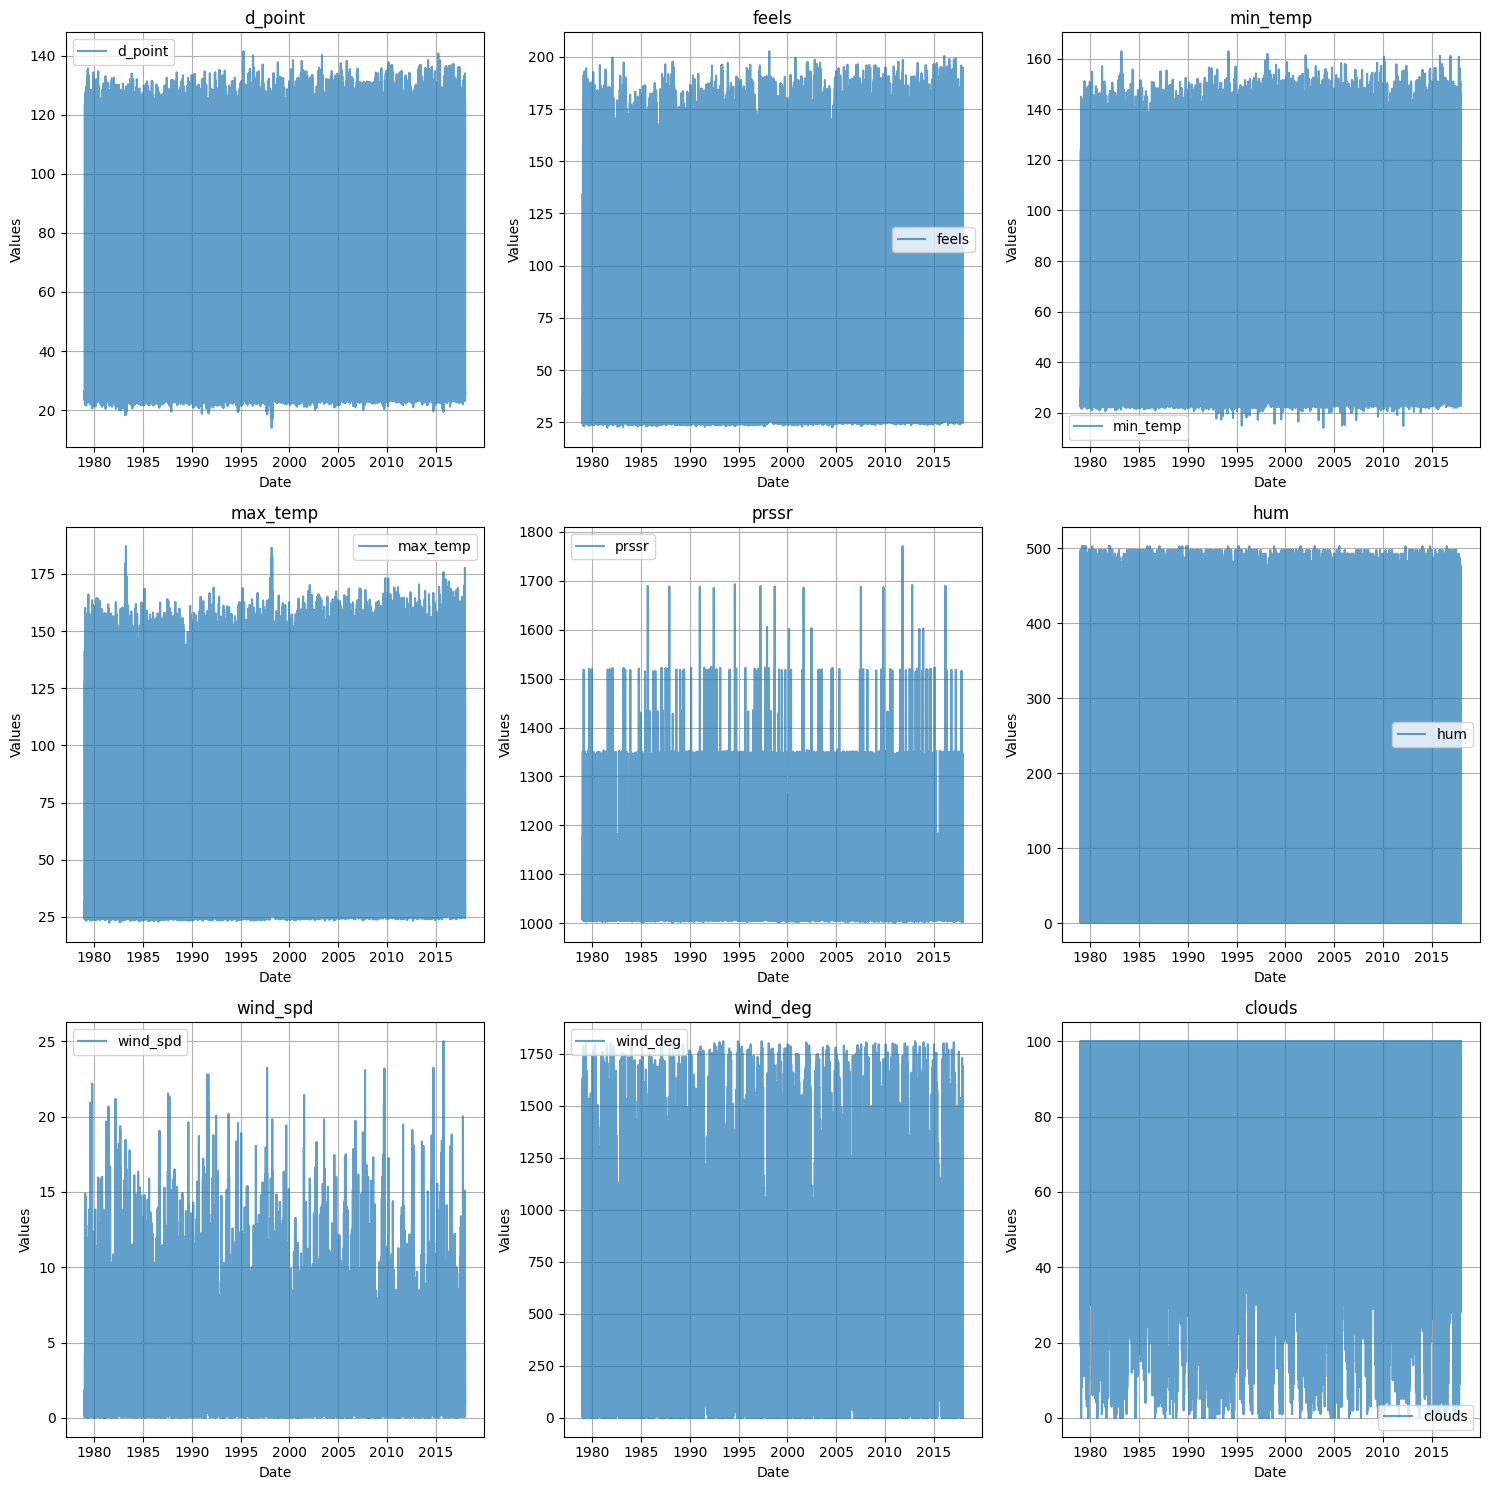

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Baca data dari file CSV
df = pd.read_csv("modified_prep.csv")

# Kolom-kolom yang akan diproses
columns_to_process = ["d_point", "feels", "min_temp", "max_temp", "prssr", "hum", "wind_spd", "wind_deg", "clouds"]

# Set kolom 'datetime' sebagai indeks
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Jumlah kolom per gambar
columns_per_figure = 3

# Jumlah total kolom
total_columns = len(columns_to_process)

# Hitung jumlah baris dan kolom untuk subplot
num_rows = (total_columns + columns_per_figure - 1) // columns_per_figure

# Buat gambar dan subplot
fig, axes = plt.subplots(num_rows, columns_per_figure, figsize=(15, 5 * num_rows))

# Melakukan Time Series Decomposition pada kolom-kolom yang diproses
for i, column in enumerate(columns_to_process):
    result = seasonal_decompose(df[column], model='additive', period=1)  # Penambahan period=1
    trend = result.trend

    # Batasi nilai ekstrem pada kolom
    lower_limit = df[column].min()  # Batas bawah sesuai dengan nilai minimum dalam kolom
    upper_limit = df[column].max()  # Batas atas sesuai dengan nilai maksimum dalam kolom
    df[column] = df.apply(lambda row: trend[row.name.month - 1] if row[column] > upper_limit else row[column], axis=1)

    # Plot kolom pada subplot yang sesuai
    row_idx = i // columns_per_figure
    col_idx = i % columns_per_figure
    ax = axes[row_idx, col_idx]
    ax.plot(df.index, df[column], label=column, alpha=0.7)
    ax.set_xlabel("Date")
    ax.set_ylabel("Values")
    ax.set_title(column)
    ax.legend()
    ax.grid(True)

# Hapus subplot yang tidak digunakan jika ada
if total_columns % columns_per_figure != 0:
    for i in range(total_columns % columns_per_figure, columns_per_figure):
        fig.delaxes(axes[num_rows - 1, i])

plt.tight_layout()
plt.show()

In [121]:
import pandas as pd

# Baca data dari file CSV
df = pd.read_csv("modified_prep.csv")

# Cek missing values dalam DataFrame
missing_values = df.isna().sum()

# Tampilkan jumlah missing values untuk setiap kolom
print(missing_values)

datetime             0
datetime_iso         0
time-zone            0
temp                 0
d_point              0
feels                0
min_temp             0
max_temp             0
prssr                0
hum                  0
wind_spd             0
wind_deg             0
rain_1h          21290
clouds               0
sea_level       148916
grnd_level      148961
rain_3h         149551
snow_1h         149184
snow_3h         149181
visibility      290768
Trend               24
dtype: int64


In [110]:
df=pd.read_csv("prepjadi1.csv")
df.describe()

,time-zone,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds
count,341880.0,341880.000000,341879.000000,341878.000000,341880.000000,341879.000000,341880.000000,341880.000000,341880.000000,341871.000000,320590.000000,341880.00000
mean,28800.0,26.770829,24.655797,29.415560,26.005687,27.780416,1013.376461,77.974568,1.474819,176.930845,0.360764,85.44976
std,0.0,2.297071,1.225252,4.391227,2.240975,2.351611,30.595693,30.453488,1.104015,77.746691,0.980127,22.80106
min,28800.0,21.550000,13.960000,22.350000,14.120000,22.370000,1001.000000,0.360000,0.000000,0.000000,-1.000000,0.00000
25%,28800.0,24.980000,23.950000,25.990000,24.250000,25.970000,1009.000000,78.000000,0.880000,141.225000,0.000000,81.00000
50%,28800.0,26.200000,24.570000,26.650000,25.480000,27.270000,1010.000000,90.000000,1.270000,189.583333,0.000000,97.00000
75%,28800.0,28.390000,25.240000,33.290000,27.640000,29.310000,1011.000000,96.000000,1.800000,229.270833,0.250000,100.00000
max,28800.0,47.915000,42.228333,50.417500,44.938125,49.656250,1770.375000,196.170000,25.000000,525.232083,27.100000,100.00000


In [112]:
# Mengisi missing values dengan rata-rata (mean) dari tiap kolom
df['d_point'].fillna(df['d_point'].mean(), inplace=True)
df['feels'].fillna(df['feels'].mean(), inplace=True)
df['min_temp'].fillna(df['min_temp'].mean(), inplace=True)
df['max_temp'].fillna(df['max_temp'].mean(), inplace=True)
df['prssr'].fillna(df['prssr'].mean(), inplace=True)
df['hum'].fillna(df['hum'].mean(), inplace=True)
df['wind_spd'].fillna(df['wind_spd'].mean(), inplace=True)
df['wind_deg'].fillna(df['wind_deg'].mean(), inplace=True)

In [108]:
# Membaca data asli dari file "original_prep.csv"
original_df = pd.read_csv("train.csv")

# Menggantikan DataFrame yang telah diubah dengan data asli
df = original_df.copy()


In [113]:
# Cek missing values dalam DataFrame
missing_values = df.isna().sum()

# Tampilkan jumlah missing values untuk setiap kolom
print(missing_values)

datetime             0
datetime_iso         0
time-zone            0
temp                 0
d_point              0
feels                0
min_temp             0
max_temp             0
prssr                0
hum                  0
wind_spd             0
wind_deg             0
rain_1h          21290
clouds               0
sea_level       148916
grnd_level      148961
rain_3h         149551
snow_1h         149184
snow_3h         149181
visibility      290768
dtype: int64


In [114]:
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('analyzeprep2.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analyzeprep2.html was generated.


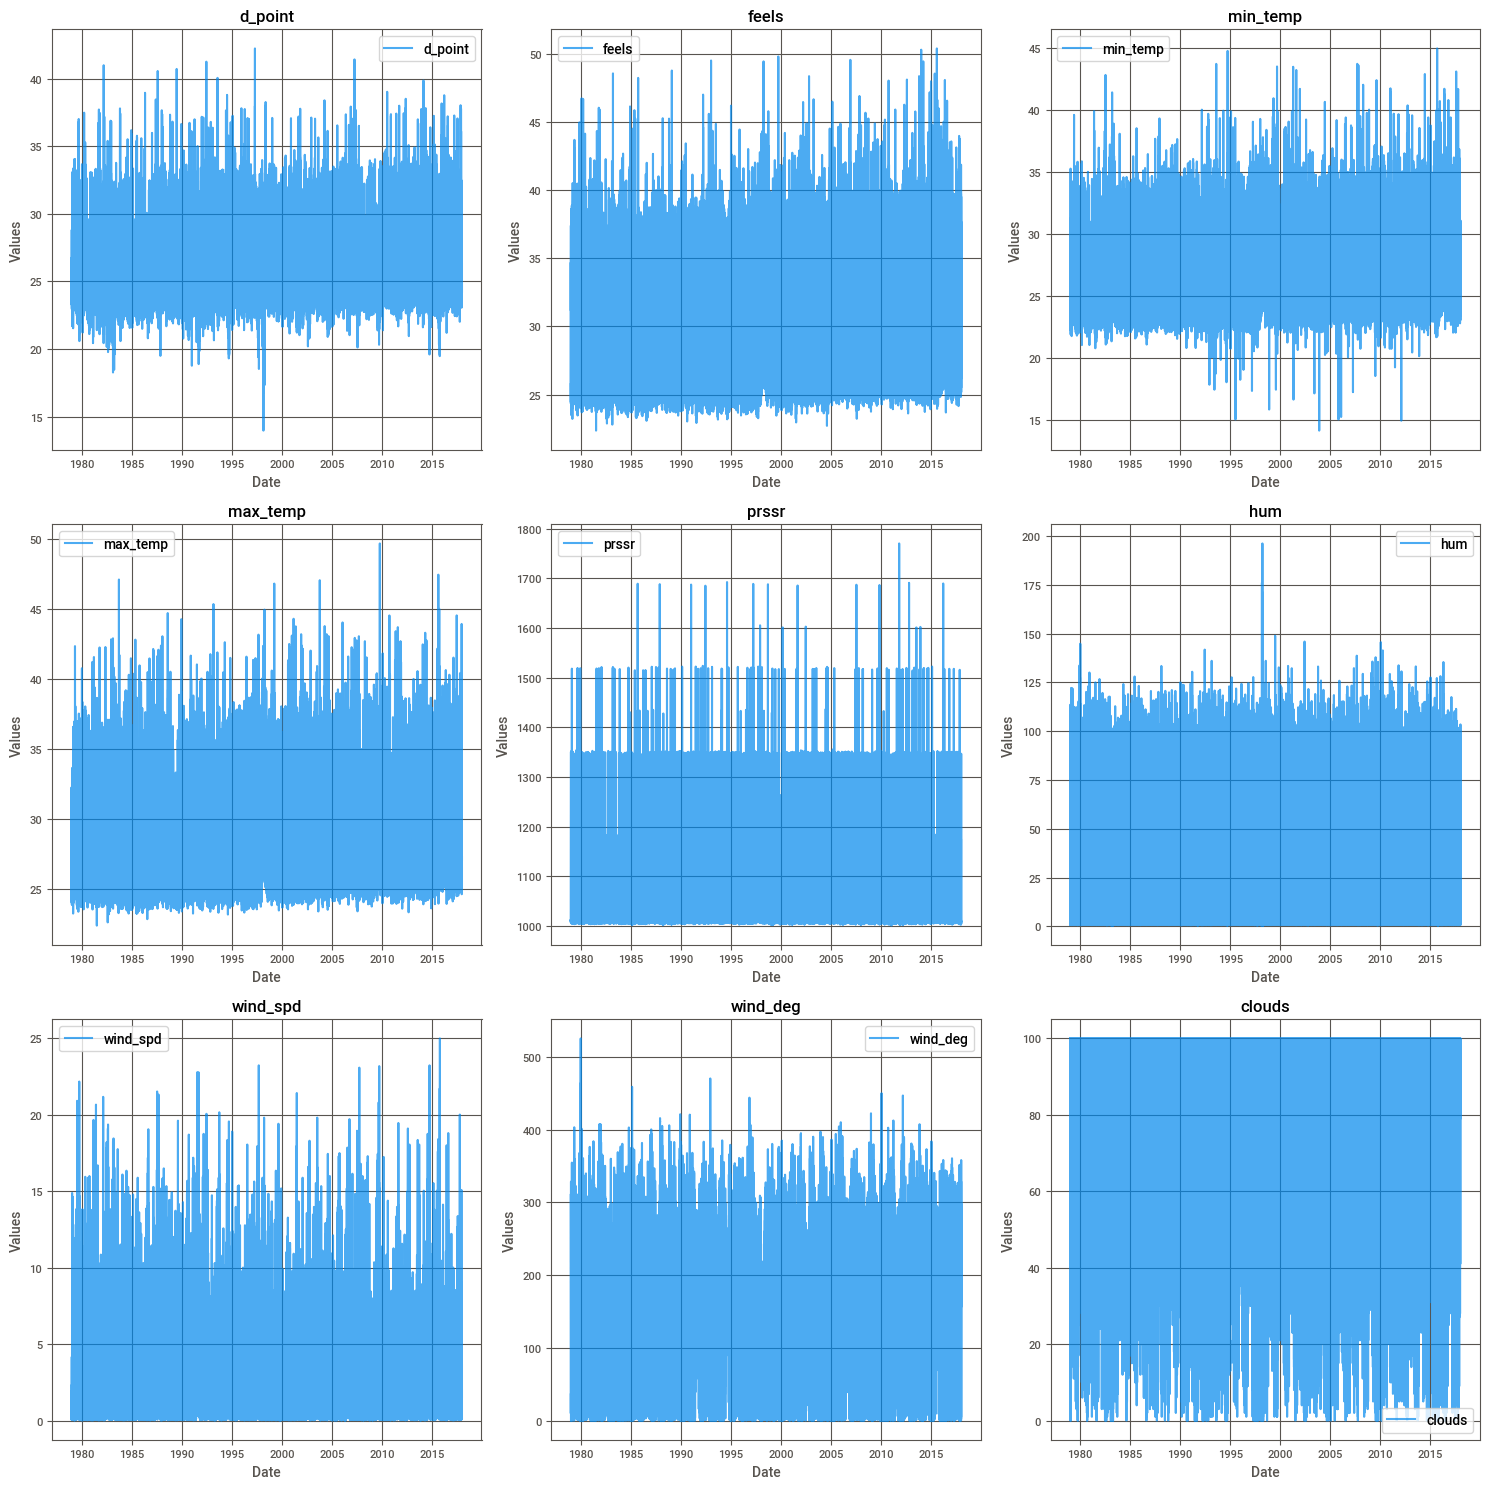

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Baca data dari file CSV
df = pd.read_csv("prep.csv")

# Kolom-kolom yang akan diproses
columns_to_process = ["d_point", "feels", "min_temp", "max_temp", "prssr", "hum", "wind_spd", "wind_deg", "clouds"]

# Kolom yang akan diabaikan
columns_to_skip = ["rain_1h"]

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Set kolom 'datetime' sebagai indeks
df.set_index('datetime', inplace=True)

# Jumlah kolom per gambar
columns_per_figure = 3

# Jumlah total kolom yang akan diproses
total_columns = len(columns_to_process)

# Hitung jumlah baris dan kolom untuk subplot
num_rows = (total_columns + columns_per_figure - 1) // columns_per_figure

# Buat gambar dan subplot
fig, axes = plt.subplots(num_rows, columns_per_figure, figsize=(15, 5 * num_rows))

# Melakukan Time Series Decomposition pada kolom-kolom yang diproses
for i, column in enumerate(columns_to_process):
    if column not in columns_to_skip:
        result = seasonal_decompose(df[column], model='additive')
        trend = result.trend

        # Batas atas sesuai dengan batas yang diberikan
        upper_limit = 40 if column in ["d_point", "feels", "min_temp", "max_temp", "temp"] else 1015 if column == "prssr" else 200

        # Ganti nilai kolom yang melebihi batas atas dengan nilai tren
        df[column] = df.apply(lambda row: trend[row.name] if row[column] > upper_limit else row[column], axis=1)

        # Plot kolom pada subplot yang sesuai
        row_idx = i // columns_per_figure
        col_idx = i % columns_per_figure
        ax = axes[row_idx, col_idx]
        ax.plot(df.index, df[column], label=column, alpha=0.7)
        ax.set_xlabel("Date")
        ax.set_ylabel("Values")
        ax.set_title(column)
        ax.legend()
        ax.grid(True)

# Hapus subplot yang tidak digunakan jika ada
if total_columns % columns_per_figure != 0:
    for i in range(total_columns % columns_per_figure, columns_per_figure):
        fig.delaxes(axes[num_rows - 1, i])

plt.tight_layout()
plt.show()

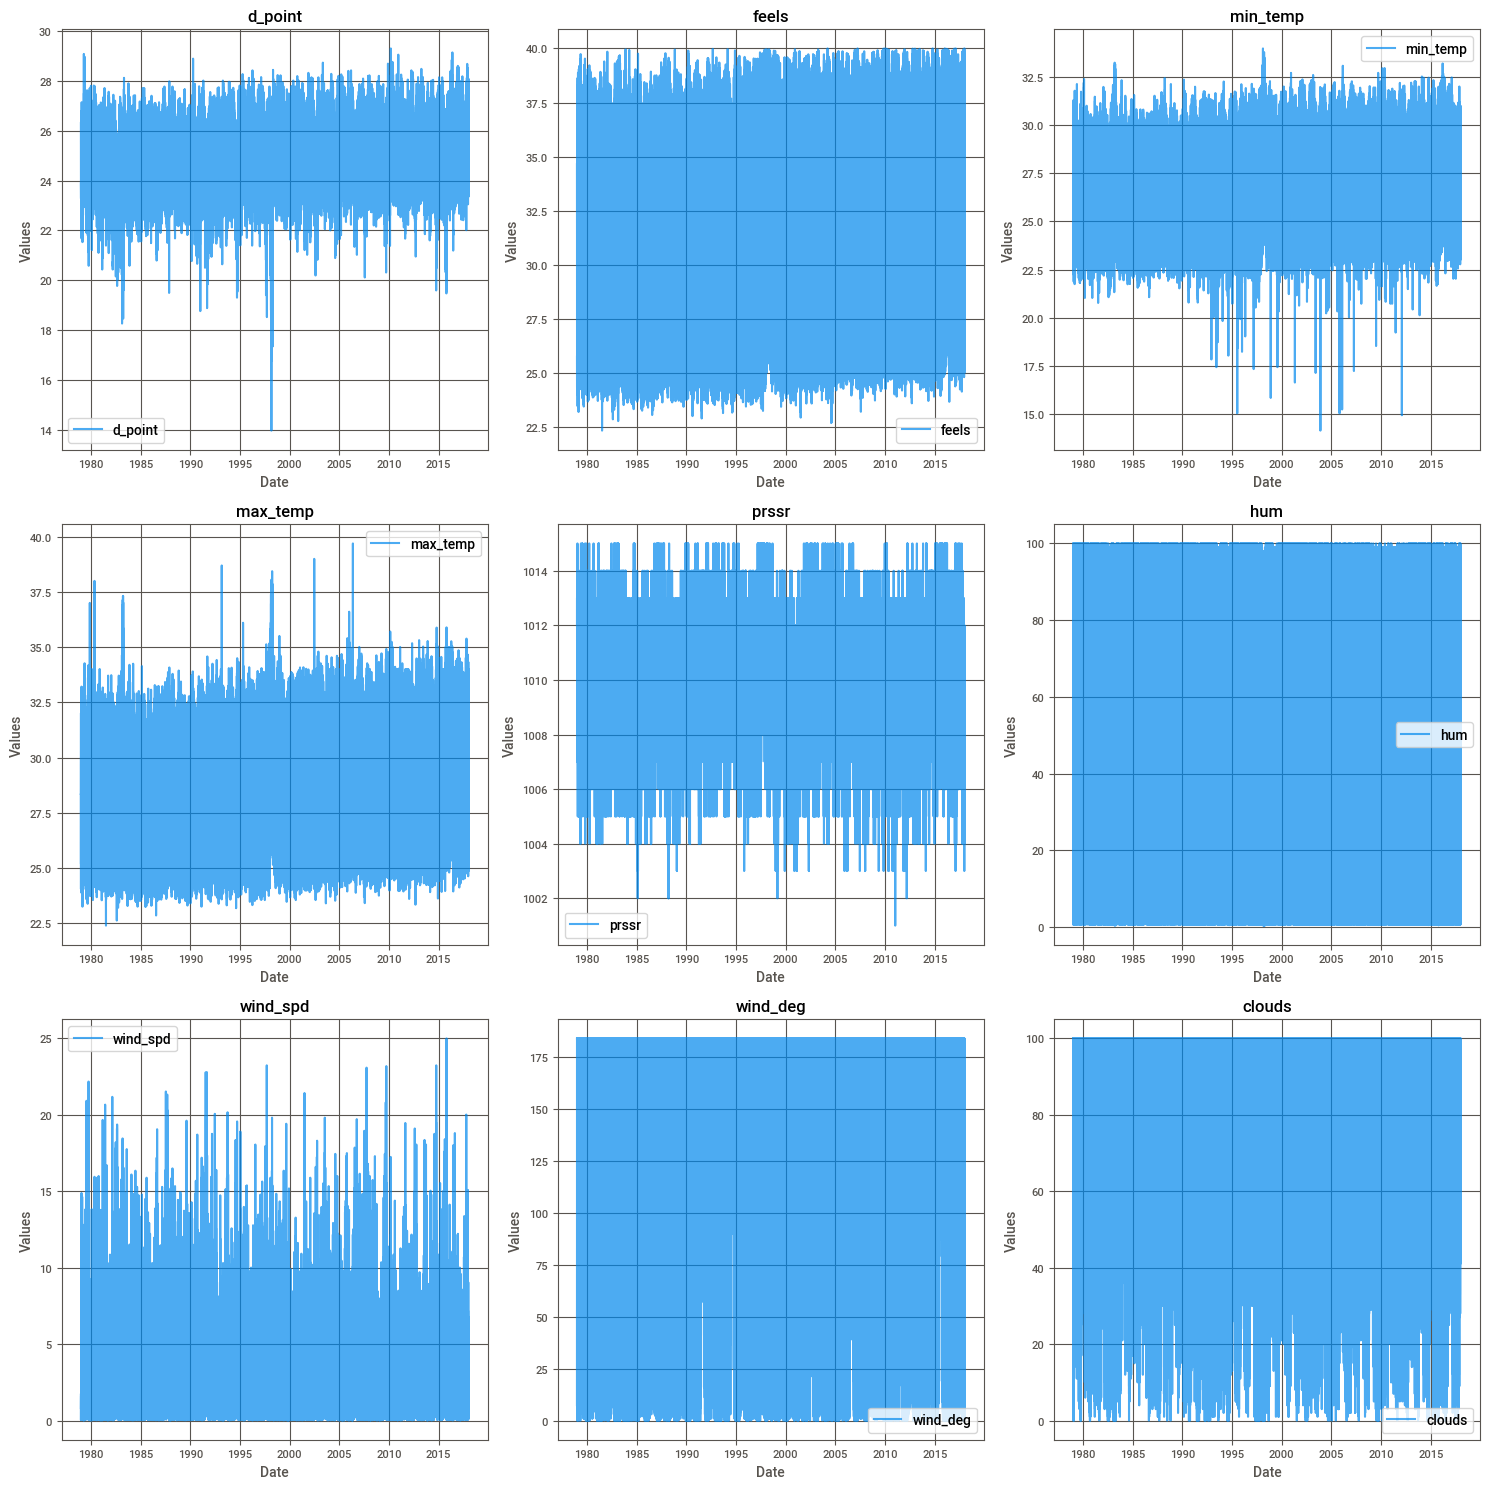

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Baca data dari file CSV
df = pd.read_csv("prep.csv")

# Kolom-kolom yang akan diproses
columns_to_process = ["d_point", "feels", "min_temp", "max_temp", "prssr", "hum", "wind_spd", "wind_deg", "clouds"]

# Kolom yang akan diabaikan
columns_to_skip = ["rain_1h"]

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Set kolom 'datetime' sebagai indeks
df.set_index('datetime', inplace=True)

# Jumlah kolom per gambar
columns_per_figure = 3

# Jumlah total kolom yang akan diproses
total_columns = len(columns_to_process)

# Hitung jumlah baris dan kolom untuk subplot
num_rows = (total_columns + columns_per_figure - 1) // columns_per_figure

# Buat gambar dan subplot
fig, axes = plt.subplots(num_rows, columns_per_figure, figsize=(15, 5 * num_rows))

# Melakukan Time Series Decomposition pada kolom-kolom yang diproses
for i, column in enumerate(columns_to_process):
    if column not in columns_to_skip:
        result = seasonal_decompose(df[column], model='additive')
        trend = result.trend

        # Batas atas sesuai dengan batas yang diberikan
        upper_limit = 40 if column in ["d_point", "feels", "min_temp", "max_temp", "temp"] else 1015 if column == "prssr" else 150

        # Ganti nilai kolom yang melebihi batas atas dengan modus
        mode_value = df[column].mode()[0]  # Ambil nilai modus dari kolom
        df[column] = df.apply(lambda row: mode_value if row[column] > upper_limit else row[column], axis=1)

        # Plot kolom pada subplot yang sesuai
        row_idx = i // columns_per_figure
        col_idx = i % columns_per_figure
        ax = axes[row_idx, col_idx]
        ax.plot(df.index, df[column], label=column, alpha=0.7)
        ax.set_xlabel("Date")
        ax.set_ylabel("Values")
        ax.set_title(column)
        ax.legend()
        ax.grid(True)

# Hapus subplot yang tidak digunakan jika ada
if total_columns % columns_per_figure != 0:
    for i in range(total_columns % columns_per_figure, columns_per_figure):
        fig.delaxes(axes[num_rows - 1, i])

plt.tight_layout()
plt.show()


In [134]:
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('analyzeprep2.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analyzeprep2.html was generated.
